<a href="https://colab.research.google.com/github/LisiSemillero/uncertainty-2020/blob/master/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Chains

Homework: Calculate probability density using a big value of K using the formula: $\pi(k) = \pi(0)P^k$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class MarkovChain:

  def __init__(self, pi_0, P):
    assert pi_0.shape[0] == P.shape[0], "pi_0 and P shape arent compatible"
    self.pi_0 = pi_0
    self.pi_i = self.pi_0
    self.P = P
    self.time = 0
    print("**************************")
    print("Initalized Markov Chain: ")
    print("Time: ", self.time)
    print("Initial Density: ", self.pi_0)
    print("Transition Function: ","\n", self.P)
    print("**************************", "\n")

  def next_time(self):
    self.time += 1
    self.pi_i = self.pi_i @ self.P
    print("Time: ", self.time)
    print(self.pi_i, "\n")

  def jump_time(self, k):
    self.time += k
    self.pi_i = self.pi_i @ np.linalg.matrix_power(self.P, k)
    print("Time: ", self.time)
    print(self.pi_i, "\n")

  def stability_analysis(self, epsilon):
    print("**************************")
    print("Initializing Stability Analysis")
    print("Initial time: ", self.time)
    print("Density: ", self.pi_i)
    print("Selected Epsilon: ", epsilon, "\n")
    initial_pi_0 = self.pi_i
    tmp_pi_0 = self.pi_i
    counting_time = self.time
    diff_density = [10e8, 10e8, 10e8]
    lst_diff = []
    
    while (diff_density[0]> epsilon or diff_density[1]> epsilon or diff_density[2]> epsilon):
      new_tmp_pi_0 = tmp_pi_0 @ self.P
      diff_density = np.abs(new_tmp_pi_0 - tmp_pi_0)
      tmp_pi_0 = new_tmp_pi_0
      counting_time +=1
      lst_diff.append(np.sqrt(np.sum(np.power(diff_density, 2))))

      

    plt.plot(range(counting_time), lst_diff)
    plt.title("Delta vs Time")
    plt.xlabel("Time")
    plt.ylabel("Delta")
    print("It converges on time number:", counting_time)
    print("Steady Density:", tmp_pi_0)
    print("**************************", "\n")

  def reset_to_initial_time(self):
    self.pi_i = self.pi_0
    self.time = 0
    print("**************************")
    print("Restarted Markov Chain: ")
    print("Time: ", self.time)
    print("Density: ", self.pi_i)
    print("**************************", "\n")

  def set_pi_0(self, pi_0):
    self.pi_0 = self.pi_i = pi_0
    


**Initializing Markov Chain**

In [9]:
pi_0 = np.array([0.41, 0.31, 0.28])
P = np.array([[0.8, 0, 0.2],
              [0.1, 0.7, 0.2],
              [0.2, 0.3, 0.5]])

m = MarkovChain(pi_0, P)

**************************
Initalized Markov Chain: 
Time:  0
Initial Density:  [0.41 0.31 0.28]
Transition Function:  
 [[0.8 0.  0.2]
 [0.1 0.7 0.2]
 [0.2 0.3 0.5]]
************************** 



**Going to the next step**

In [10]:
m.next_time()

Time:  1
[0.415 0.301 0.284] 



**Going to the next step 3 times**

In [11]:
m.next_time()
m.next_time()
m.next_time()

Time:  2
[0.4189 0.2959 0.2852] 

Time:  3
[0.42175 0.29269 0.28556] 

Time:  4
[0.423781 0.290551 0.285668] 



**Sometimes we will want to restart to the initial time**

In [12]:
m.reset_to_initial_time()

**************************
Restarted Markov Chain: 
Time:  0
Density:  [0.41 0.31 0.28]
************************** 



**Jumping to a time using the formula $\pi(k) = \pi(0)P^k$**

In [13]:
m.jump_time(10)

Time:  10
[0.42800649 0.28627926 0.28571425] 



**To do a stability Analysis we need to restart to initial time to specify how many steps we have to forward to get a steady density**

**************************
Restarted Markov Chain: 
Time:  0
Density:  [0.41 0.31 0.28]
************************** 

**************************
Initializing Stability Analysis
Initial time:  0
Density:  [0.41 0.31 0.28]
Selected Epsilon:  0.0001 

It converges on time number: 13
Steady Density: [0.42837765 0.28590806 0.28571428]
************************** 



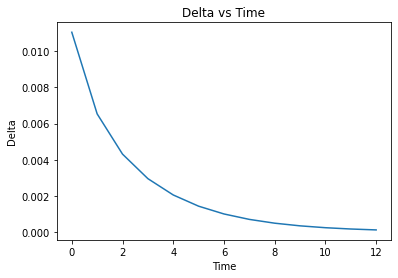

In [14]:
m.reset_to_initial_time()
m.stability_analysis(0.0001)

**What do you think that is going to happen if we start in another initial** $\pi(0)$**?**

**We achieved another steady state, we can see these steady points like:**


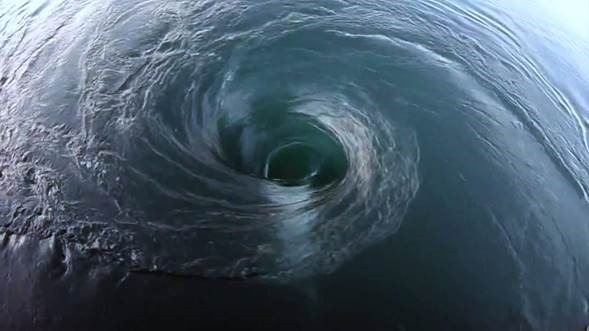

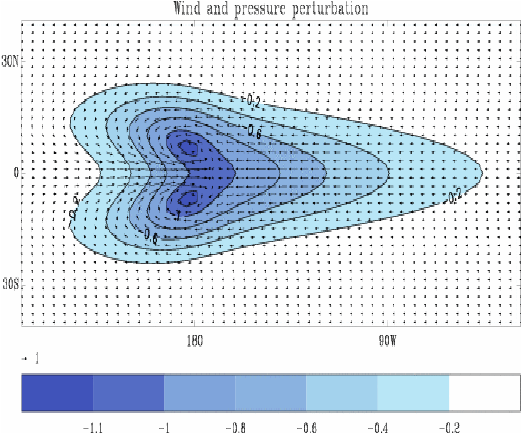



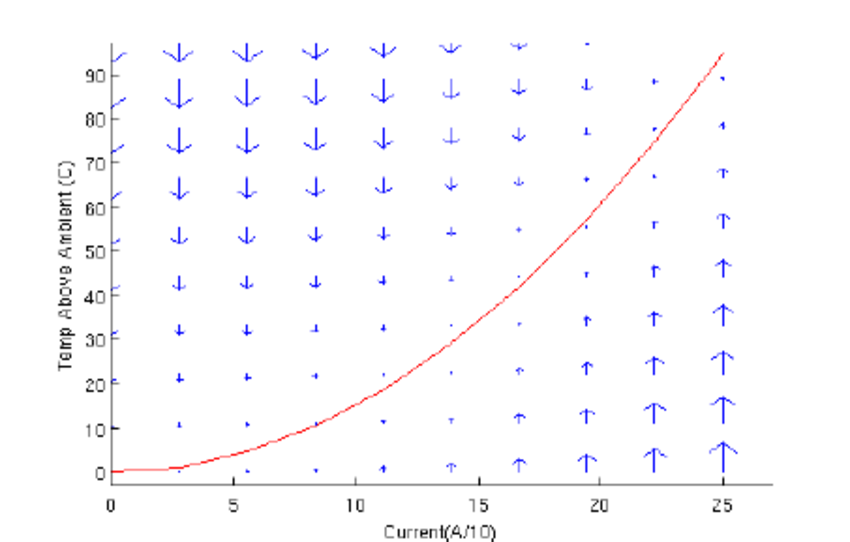


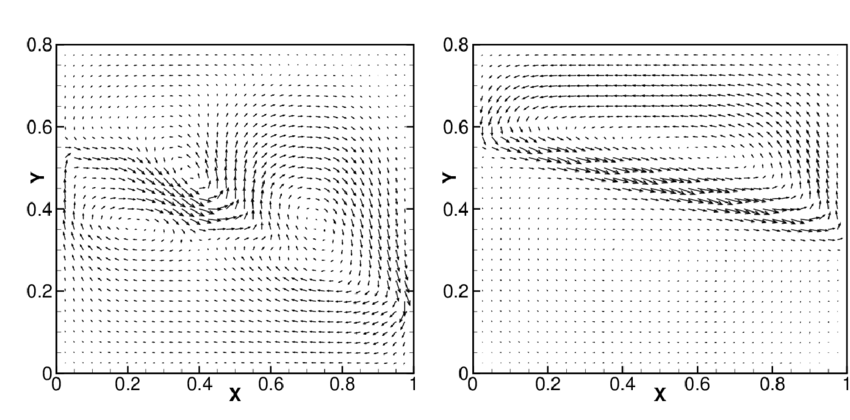